# <font color=red>Tutorial 6 - Visualization - Case Study</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("viridis")

In [2]:
df = pd.read_csv('Tutorial_6_data.csv') # console games sale dataset
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In this data set there are 11 columns:
* Rank - Ranking of overall sales
* Name - The game's name
* Platform - Platform of the game's release (i.e. PC, PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the game (i.e. Action, Sports, Role-Playing, etc.)
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global Sales - Total worldwide sales

In [3]:
df.shape

(16598, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


Let's do a simple null value check: 

In [6]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

We found some null values. We will simply drop the entries for games that do not have all the data:

In [7]:
df_clean = df.copy()
df_clean.dropna(inplace=True)
df_clean.shape

(16291, 11)

### Who are the 5 most global selling publishers?

In [8]:
top_selling_publishers_df = df_clean.groupby('Publisher')['Global_Sales'].sum()
top_selling_publishers_df

Publisher
10TACLE Studios                  0.11
1C Company                       0.10
20th Century Fox Video Games     1.94
2D Boy                           0.04
3DO                             10.12
                                ...  
id Software                      0.03
imageepoch Inc.                  0.04
inXile Entertainment             0.10
mixi, Inc                        0.86
responDESIGN                     0.13
Name: Global_Sales, Length: 576, dtype: float64

We got a Series object since the default of groupby() is to set the groupby column as the new index, but Seaborn requires a Dataframe as input. We can use the `as_index=False` parameter for groupby() to avoid setting the groupby column as index, then we will get a Dataframe object:

In [9]:
top_selling_publishers_df = df_clean.groupby('Publisher', as_index=False)['Global_Sales'].sum() 
top_selling_publishers_df

,Publisher,Global_Sales
0,10TACLE Studios,0.11
1,1C Company,0.10
2,20th Century Fox Video Games,1.94
3,2D Boy,0.04
4,3DO,10.12
...,...,...
571,id Software,0.03
572,imageepoch Inc.,0.04
573,inXile Entertainment,0.10
574,"mixi, Inc",0.86


In [10]:
top_selling_publishers_df.sort_values(by='Global_Sales', ascending=False, inplace=True)
top_selling_publishers_df

,Publisher,Global_Sales
359,Nintendo,1784.43
138,Electronic Arts,1093.39
21,Activision,721.41
455,Sony Computer Entertainment,607.28
524,Ubisoft,473.54
...,...,...
147,Epic Games,0.01
389,Paradox Development,0.01
421,Rain Games,0.01
45,Ascaron Entertainment,0.01


In [11]:
top5_selling_publishers_df = top_selling_publishers_df[:5]
top5_selling_publishers_df

,Publisher,Global_Sales
359,Nintendo,1784.43
138,Electronic Arts,1093.39
21,Activision,721.41
455,Sony Computer Entertainment,607.28
524,Ubisoft,473.54


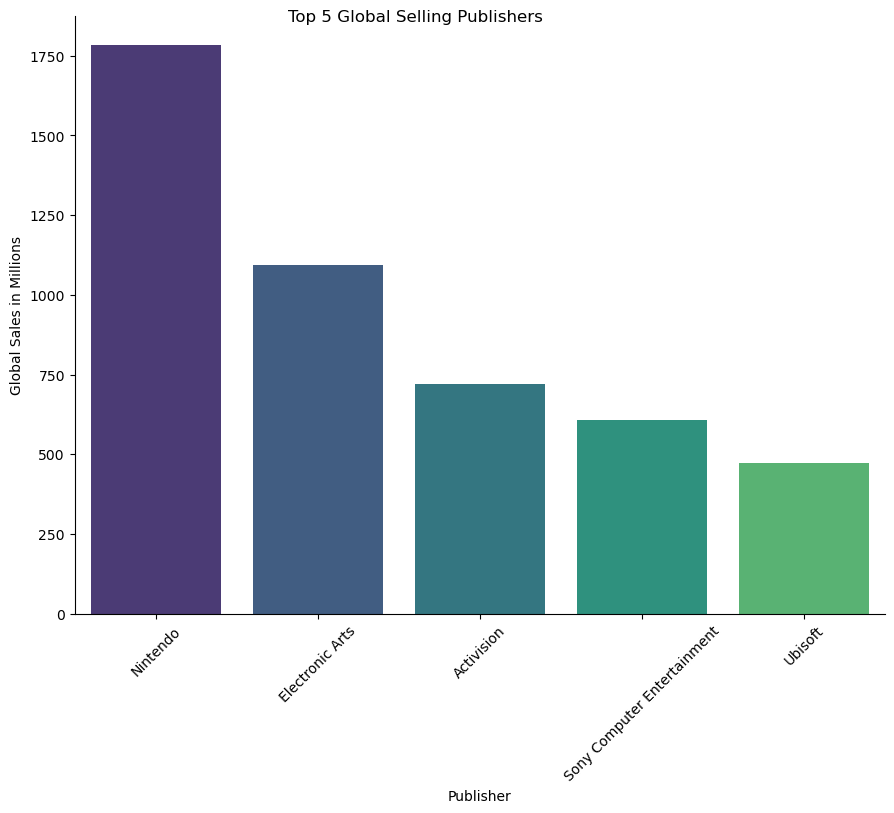

In [12]:
facetgrid_obj = sns.catplot(kind='bar', data=top5_selling_publishers_df, x='Publisher', y='Global_Sales')
facetgrid_obj.set_xticklabels(rotation=45) # Rotate the x label ticks text by 45 degrees
facetgrid_obj.fig.suptitle('Top 5 Global Selling Publishers') # set figure title
facetgrid_obj.set(xlabel='Publisher', ylabel='Global Sales in Millions') # ylim=[0, 1800]) # set y label
facetgrid_obj.fig.set_size_inches(10, 7) # set figure size

## <font color=blue> **Exercise** </font>

Every answer has to be supported by a clear visualization

1. In which year was the number of game releases the highest?  
2. Which years saw the biggest changes in global sales? That is, in which years were there the biggest increase in sales, and in which years were there the biggest decrease in sales?
3. Is there an association between number of releases per year and global sales?  
4. Sales of top platforms by genre
    * Add a new column named '7th_gen'. The column will contain boolean values - True if the platform belongs to any of the 7th generation platforms: Wii, PS3, or X360; False otherwise.
    * Extract a new dataframe containing only the 7th generation platforms using your newly created column
    * Among the 7th generation platforms: Who are leading the sales in Europe in the action genre, and who are leading in the sports genre? (present in a single plot)
   

## <font color=blue> **Solution** </font>

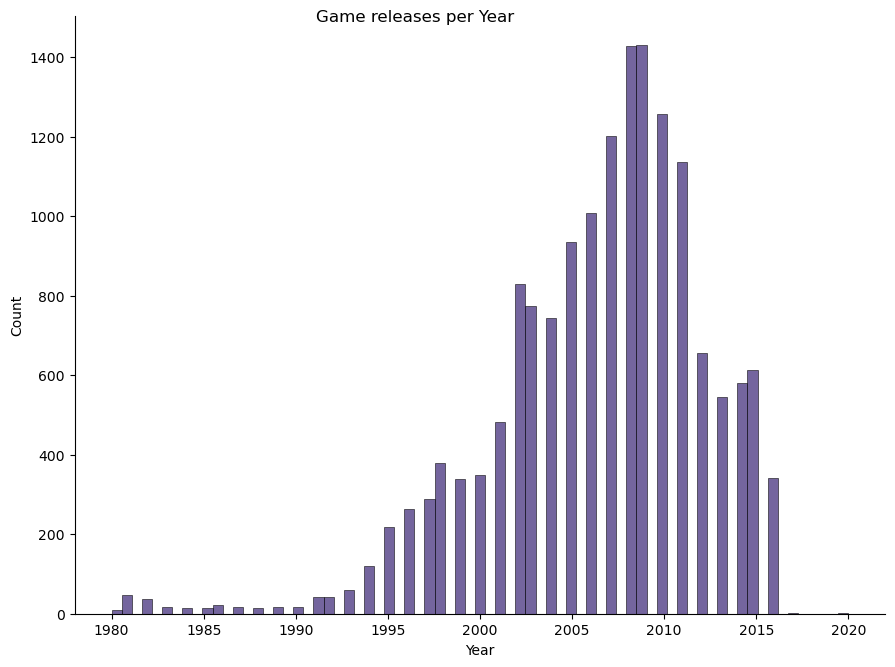

In [13]:
# 1 In which year was the number of game releases the highest?
facetgrid_obj = sns.displot(data=df_clean, x='Year') # , discrete=True)
facetgrid_obj.fig.suptitle('Game releases per Year')
facetgrid_obj.fig.set_size_inches(10, 7)

Seems like the top releases were at 2009, let's verify:

In [14]:
df_clean.groupby('Year').size().sort_values(ascending=False).head()

Year
2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
dtype: int64

In [15]:
# 2. Which years saw the biggest changes in global sales? 
# That is, in which years were there the biggest increase in sales, 
# and in which years were there the biggest decrease in sales?
sales_per_year_df = df_clean.groupby('Year', as_index=False)['Global_Sales'].sum()
sales_per_year_df.Year = sales_per_year_df.Year.astype('int') # converting year from float to int
sales_per_year_df.head()

,Year,Global_Sales
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36


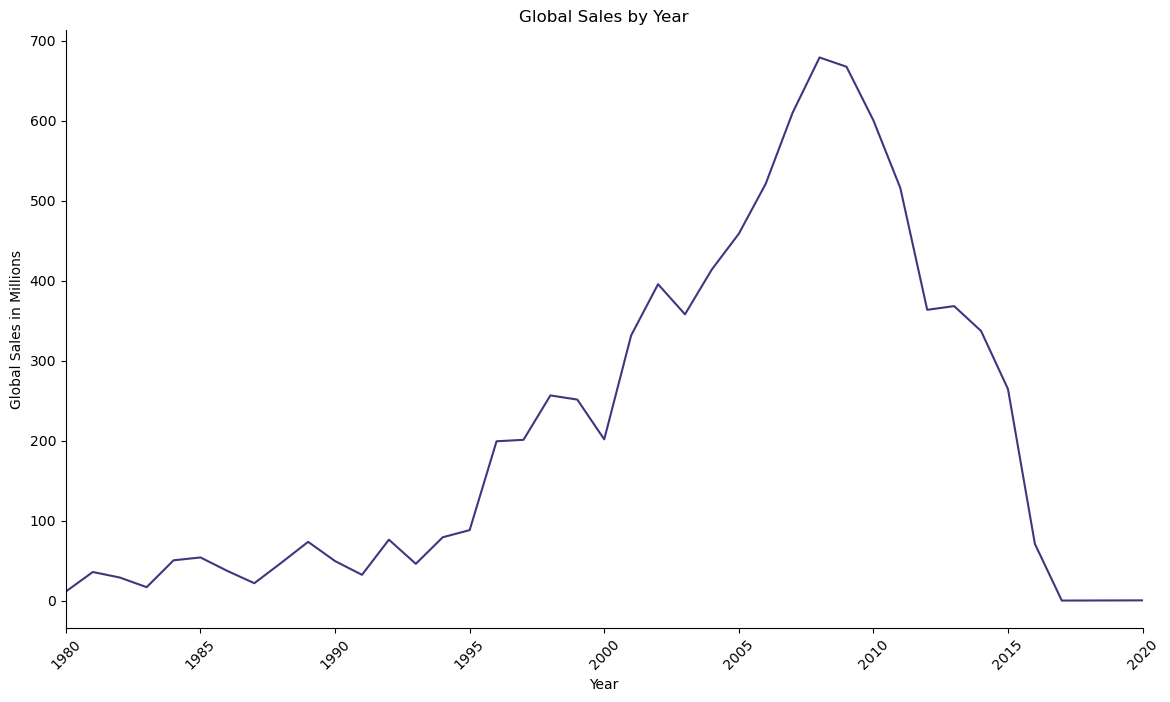

In [16]:
# 2
facetgrid_obj = sns.relplot(data=sales_per_year_df, kind='line', x='Year', y='Global_Sales')
facetgrid_obj.set_xticklabels(rotation=45) # Rotate the x label ticks text by 90 degrees
facetgrid_obj.fig.set_size_inches(13, 7) # set figure size
facetgrid_obj.set(ylabel='Global Sales in Millions', xlabel='Year', title='Global Sales by Year', xlim=[1980, 2020]);

It is not completly clear from this plot what are the specific years we are looking for.

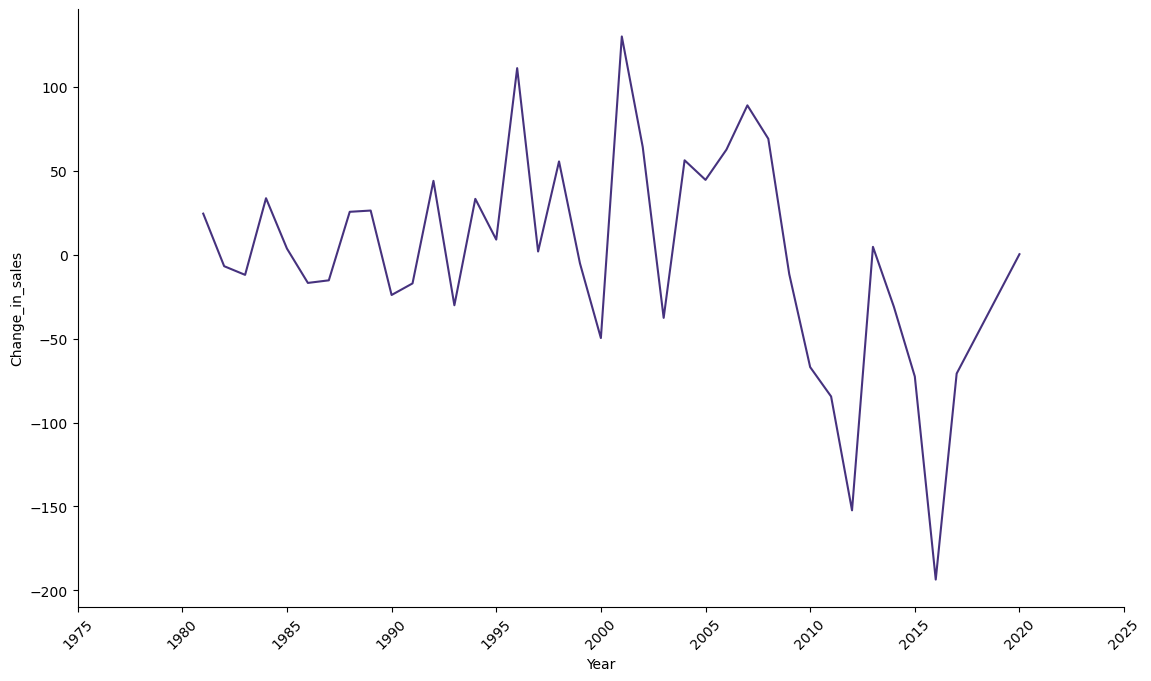

In [17]:
# we will use `diff()` to calculate the change between following rows
sales_per_year_df['Change_in_sales'] = sales_per_year_df['Global_Sales'].diff()
# plot the results
facetgrid_obj = sns.relplot(data=sales_per_year_df, kind='line', x='Year', y='Change_in_sales')
facetgrid_obj.set_xticklabels(rotation=45) # Rotate the x label ticks text by 90 degrees
facetgrid_obj.fig.set_size_inches(13, 7) # set figure size

It looks like the biggest rise was between 2000-2005 and the biggest drop between 2015-2020

lets find the exact years:

In [18]:
sales_per_year_df[(sales_per_year_df['Year'] >= 2000) & (sales_per_year_df['Year'] <= 2005)]

,Year,Global_Sales,Change_in_sales
20,2000,201.56,-49.71
21,2001,331.47,129.91
22,2002,395.52,64.05
23,2003,357.85,-37.67
24,2004,414.01,56.16
25,2005,458.51,44.50


In [19]:
sales_per_year_df[(sales_per_year_df['Year'] >= 2015) & (sales_per_year_df['Year'] <= 2020)]

,Year,Global_Sales,Change_in_sales
35,2015,264.44,-72.59
36,2016,70.90,-193.54
37,2017,0.05,-70.85
38,2020,0.29,0.24


Notice that the years 2018 and 2019 are missing so the difference between 2017 to 2020 includes them.<br>
The year with the biggest rise was 2001 and the year with the biggest drop was 2016.

In [20]:
# 3 Is there an association between number of releases per year and global sales?
sales_vs_releases_df = df_clean.groupby('Year', as_index=False).agg(Total_sales = ('Global_Sales', 'sum'), 
                                                                    Num_of_releases = ('Global_Sales', 'size'))
sales_vs_releases_df.head()

,Year,Total_sales,Num_of_releases
0,1980.0,11.38,9
1,1981.0,35.77,46
2,1982.0,28.86,36
3,1983.0,16.79,17
4,1984.0,50.36,14


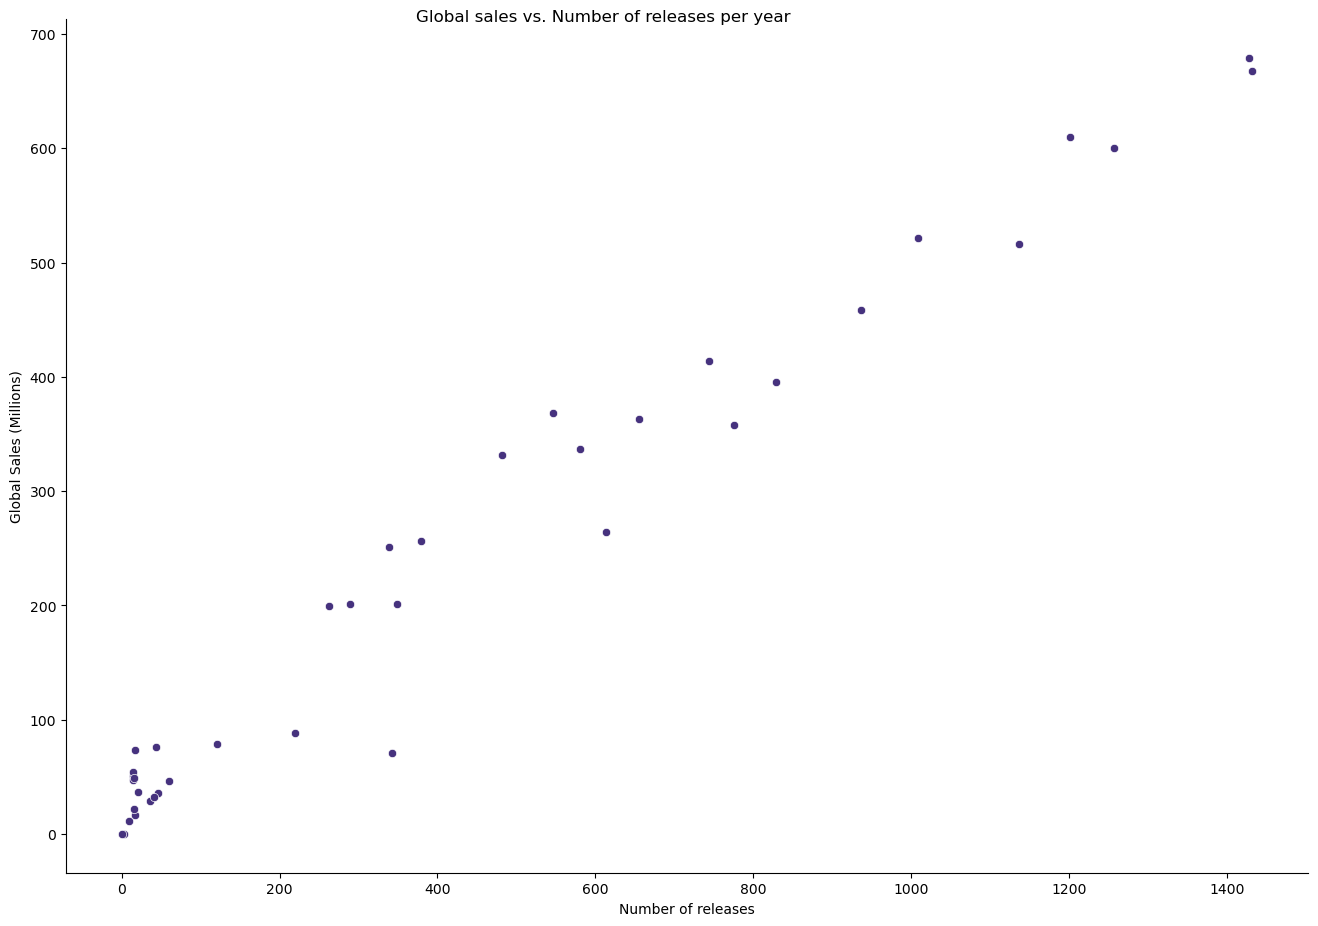

In [21]:
sns_object = sns.relplot(data=sales_vs_releases_df, y='Total_sales', x='Num_of_releases', marker='o')
sns_object.fig.set_size_inches(15,10) # set figure size
sns_object.fig.suptitle('Global sales vs. Number of releases per year') # set figure title
sns_object.set(xlabel='Number of releases', ylabel='Global Sales (Millions)') # set axis labels

Number of releases and global sales are clearly positively associated (although there are cases in which more releases were not necessarily linked to more sales)

In [22]:
# 4 Sales of top platforms by genre:
# Add a new column named '7th_gen'. The column will contain boolean values - 
# True if the platform belongs to any of the 7th generation platforms: Wii, PS3, or X360; False otherwise.
def add_7th_gen(platform):
    if (platform == 'Wii') | (platform == 'PS3') | (platform == 'X360'):
        return True
    else:
        return False

In [23]:
df_clean['7th_gen'] = df_clean['Platform'].apply(add_7th_gen)
df_clean.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,7th_gen
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,True
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,False
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,True
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,True
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,False


In [24]:
# Extract a new dataframe containing only the 7th generation platforms using your newly created column
filt = df_clean['7th_gen'] == True
video7th_df = df_clean.loc[filt] 
print(df_clean.shape)
print(video7th_df.shape)
video7th_df.head()

(16291, 12)
(3828, 12)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,7th_gen
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,True
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,True
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,True
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,True
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,True


In [25]:
# Among the 7th generation platforms: Who are leading the sales in Europe in the action genre, 
# and who are leading in the sports genre? (present in a single plot)
genre_sales_df = video7th_df.groupby(['Platform', 'Genre'], as_index=False)['EU_Sales'].sum()
genre_sales_df.head()

,Platform,Genre,EU_Sales
0,PS3,Action,109.26
1,PS3,Adventure,8.13
2,PS3,Fighting,14.69
3,PS3,Misc,16.47
4,PS3,Platform,10.90


In [26]:
filt = (genre_sales_df['Genre'] == 'Action') | (genre_sales_df['Genre'] == 'Sports')
gb_genre_action_sports = genre_sales_df.loc[filt]
gb_genre_action_sports

,Platform,Genre,EU_Sales
0,PS3,Action,109.26
10,PS3,Sports,47.65
12,Wii,Action,30.58
22,Wii,Sports,94.87
24,X360,Action,75.85
34,X360,Sports,37.16


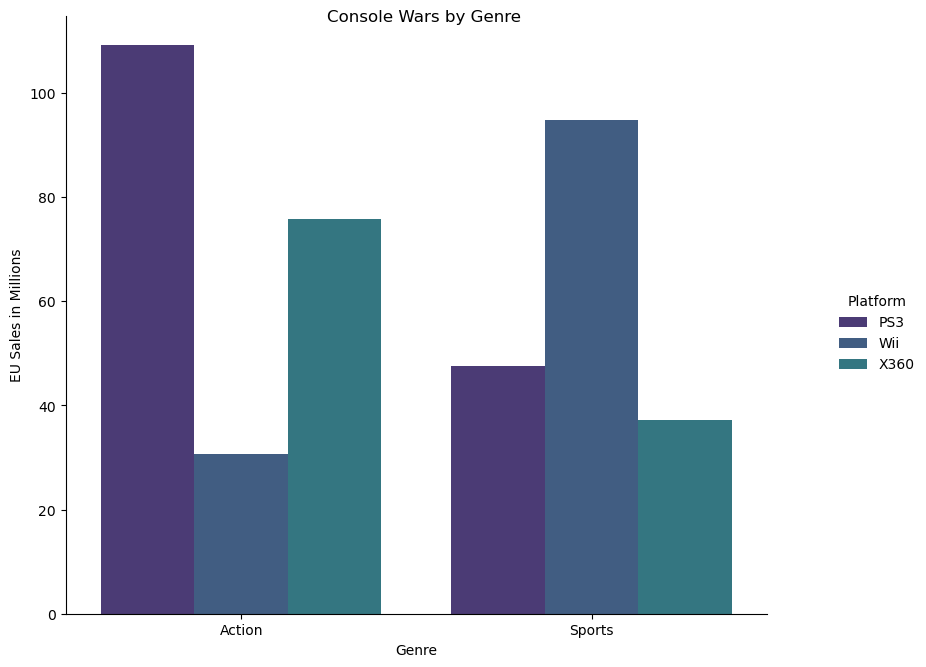

In [27]:
sns_object = sns.catplot(data=gb_genre_action_sports, kind='bar', x='Genre', y='EU_Sales', hue='Platform')
sns_object.fig.set_size_inches(10, 7) # set figure size
sns_object.fig.suptitle('Console Wars by Genre') # set figure title
sns_object.set(ylabel='EU Sales in Millions') # set y label